<a href="https://colab.research.google.com/github/JingchenYan1/Intro-to-ML/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

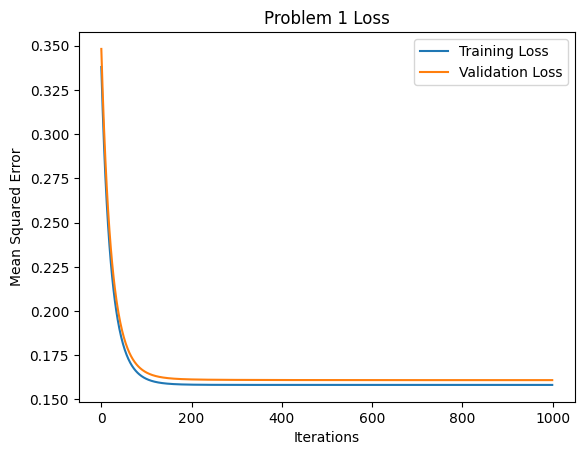

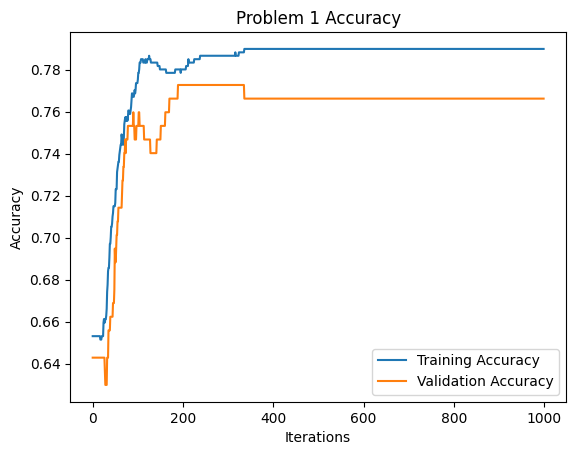

Accuracy: 0.7662337662337663
Precision: 0.7435897435897436
Recall: 0.5272727272727272
F1 Score: 0.6170212765957447


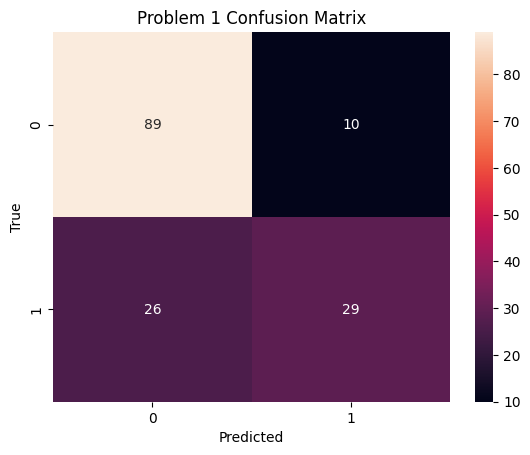

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
db = pd.DataFrame(pd.read_csv(file_path))

y = db.iloc[:, 8].values
X = db.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values

from sklearn.model_selection import train_test_split

train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

theta = np.zeros(8)
learning_rate = 0.01
n_iterations = 1000

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_b_train = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_b_val = np.c_[np.ones((len(X_val_scaled), 1)), X_val_scaled]

theta_init = np.zeros(X_b_train.shape[1])  # 定义theta_init

from sklearn.metrics import accuracy_score

def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, n_iterations):
    m = len(X_train)
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(X_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        y_train_pred = X_train.dot(theta) >= 0.5
        y_val_pred = X_val.dot(theta) >= 0.5

        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    return theta, train_losses, val_losses, train_accuracies, val_accuracies

theta, train_losses, val_losses, train_accuracies, val_accuracies = gradient_descent(
    X_b_train, y_train, X_b_val, y_val, theta_init.copy(), learning_rate, n_iterations)

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Problem 1 Loss')
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Problem 1 Accuracy')
plt.show()

y_val_pred = X_b_val.dot(theta) >= 0.5

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Problem 1 Confusion Matrix')
plt.show()



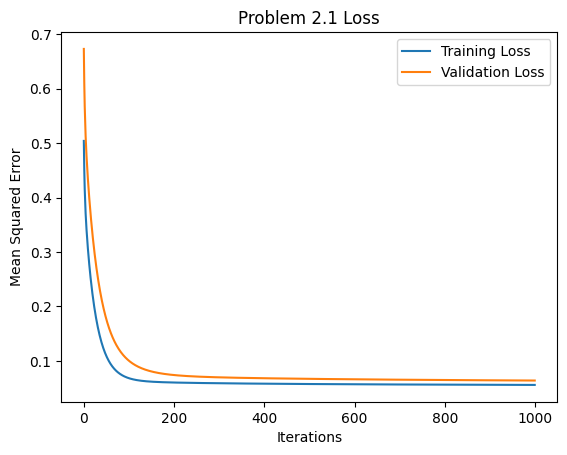

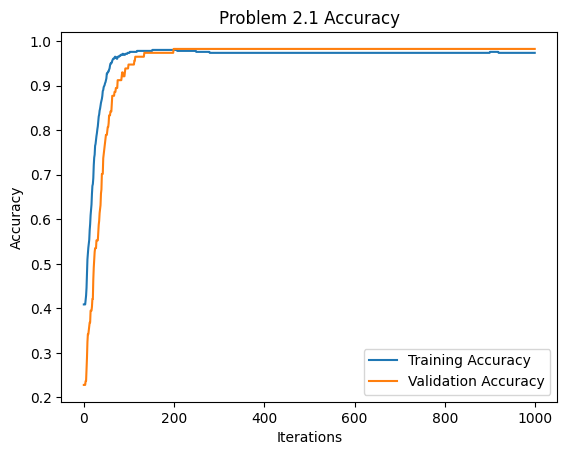

Accuracy: 0.9824561403508771
Precision: 0.9886363636363636
Recall: 0.9886363636363636
F1 Score: 0.9886363636363636


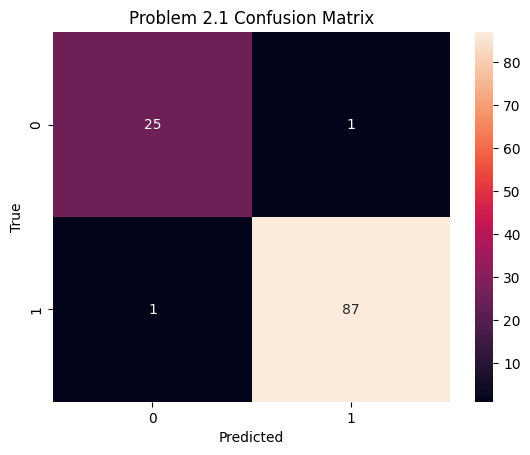

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


breast = load_breast_cancer()
breast_data = breast.data

breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

y = breast_dataset['label']

X = breast_dataset.drop(columns=['label'])

from sklearn.model_selection import train_test_split

train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

theta = np.zeros(30)
learning_rate = 0.01
n_iterations = 1000

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_b_train = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_b_val = np.c_[np.ones((len(X_val_scaled), 1)), X_val_scaled]

theta_init = np.zeros(X_b_train.shape[1])  # 定义theta_init

from sklearn.metrics import accuracy_score

def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, n_iterations):
    m = len(X_train)
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(X_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        y_train_pred = X_train.dot(theta) >= 0.5
        y_val_pred = X_val.dot(theta) >= 0.5

        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    return theta, train_losses, val_losses, train_accuracies, val_accuracies

theta, train_losses, val_losses, train_accuracies, val_accuracies = gradient_descent(
    X_b_train, y_train, X_b_val, y_val, theta_init.copy(), learning_rate, n_iterations)

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Problem 2.1 Loss')
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Problem 2.1 Accuracy')
plt.show()

y_val_pred = X_b_val.dot(theta) >= 0.5

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Problem 2.1 Confusion Matrix')
plt.show()

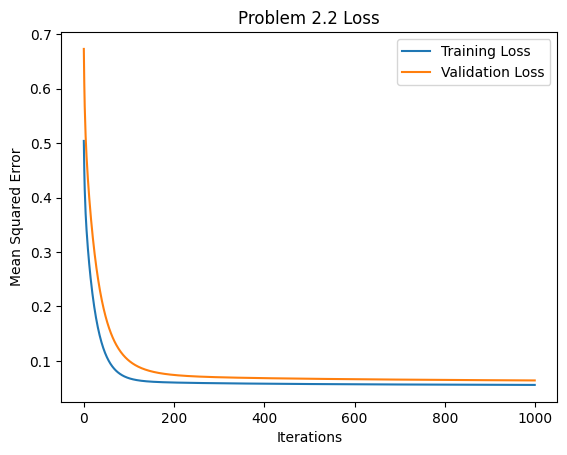

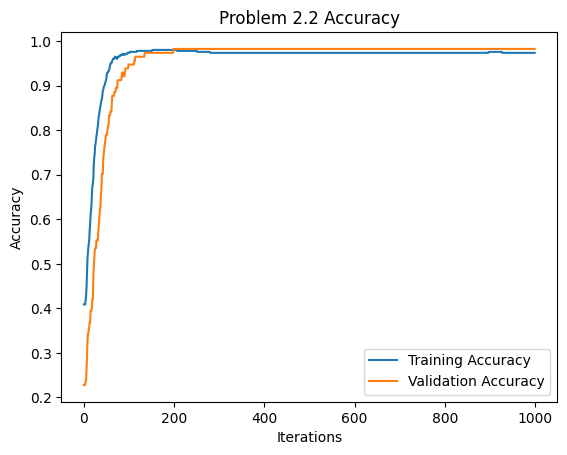

Accuracy: 0.9824561403508771
Precision: 0.9886363636363636
Recall: 0.9886363636363636
F1 Score: 0.9886363636363636


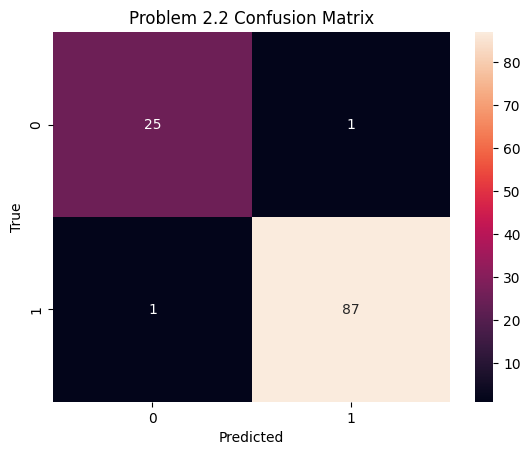

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


breast = load_breast_cancer()
breast_data = breast.data

breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

y = breast_dataset['label']

X = breast_dataset.drop(columns=['label'])

from sklearn.model_selection import train_test_split

train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

theta = np.zeros(30)
learning_rate = 0.01
n_iterations = 1000

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_b_train = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_b_val = np.c_[np.ones((len(X_val_scaled), 1)), X_val_scaled]

theta_init = np.zeros(X_b_train.shape[1])  # 定义theta_init

from sklearn.metrics import accuracy_score

lambda_reg = 0.1

def compute_loss(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1 / m) * np.sum(np.square(predictions - y))
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta))
    return loss + reg_term

def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, n_iterations, lambda_reg):
    m = len(X_train)
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for iteration in range(n_iterations):
        predictions = X_train.dot(theta)
        gradients = (2 / m) * X_train.T.dot(predictions - y_train) + (2 * lambda_reg / m) * theta
        theta -= learning_rate * gradients

        train_loss = compute_loss(X_train, y_train, theta, lambda_reg)
        val_loss = compute_loss(X_val, y_val, theta, lambda_reg)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        y_train_pred = X_train.dot(theta) >= 0.5
        y_val_pred = X_val.dot(theta) >= 0.5

        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    return theta, train_losses, val_losses, train_accuracies, val_accuracies

theta, train_losses, val_losses, train_accuracies, val_accuracies = gradient_descent(
    X_b_train, y_train, X_b_val, y_val, theta_init.copy(), learning_rate, n_iterations, lambda_reg)

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Problem 2.2 Loss')
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Problem 2.2 Accuracy')
plt.show()

y_val_pred = X_b_val.dot(theta) >= 0.5

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Problem 2.2 Confusion Matrix')
plt.show()

Accuracy: 0.9210526315789473
Precision: 0.9759036144578314
Recall: 0.9204545454545454
F1 Score: 0.9473684210526315


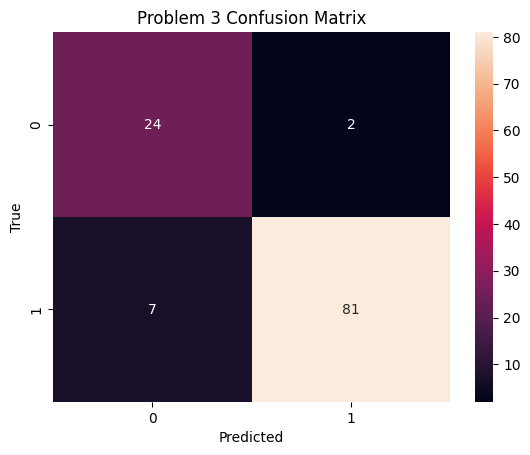

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


breast = load_breast_cancer()
breast_data = breast.data

breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

y = breast_dataset['label']

X = breast_dataset.drop(columns=['label'])

from sklearn.model_selection import train_test_split

train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)

y_val_pred = model.predict(X_val_scaled)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Problem 3 Confusion Matrix')
plt.show()

Best K: 2
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


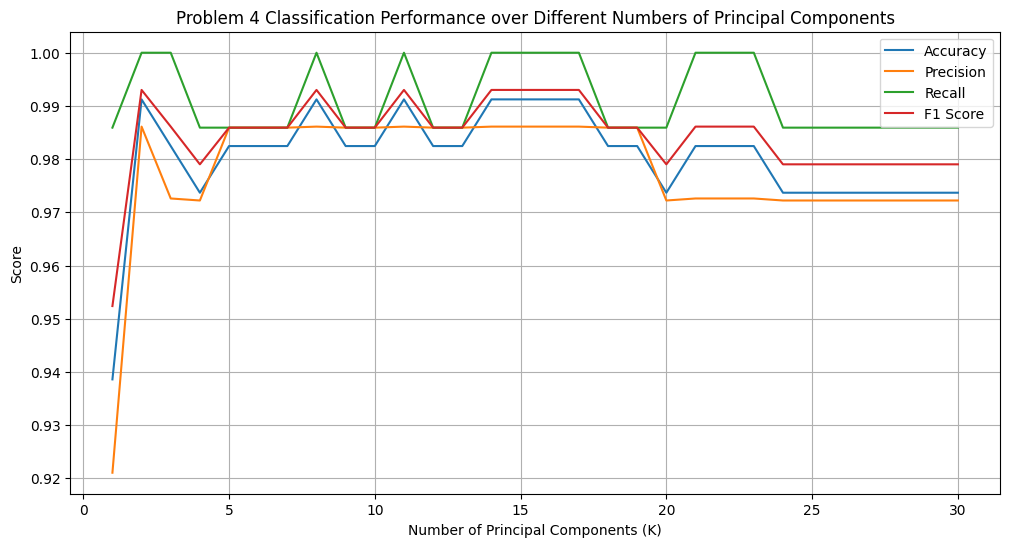

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


breast = load_breast_cancer()
breast_data = breast.data

breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

y = breast_dataset['label']

X = breast_dataset.drop(columns=['label'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

K_range = range(1, 31)
accuracies = []
precisions = []
recalls = []
f1_scores = []

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

for K in K_range:
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)

    y_val_pred = model.predict(X_val_pca)

    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

optimal_K = K_range[np.argmax(accuracies)]
print(f'Best K: {optimal_K}')

plt.figure(figsize=(12, 6))

plt.plot(K_range, accuracies, label='Accuracy')
plt.plot(K_range, precisions, label='Precision')
plt.plot(K_range, recalls, label='Recall')
plt.plot(K_range, f1_scores, label='F1 Score')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Problem 4 Classification Performance over Different Numbers of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

Best K: 3
Accuracy: 0.868421052631579
Precision: 0.8783783783783784
Recall: 0.9154929577464789
F1 Score: 0.896551724137931


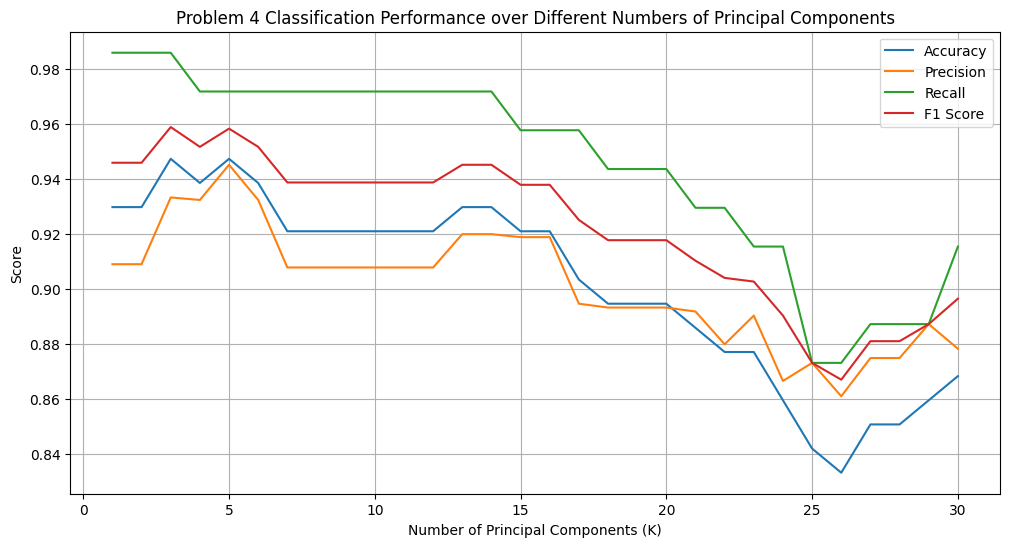

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


breast = load_breast_cancer()
breast_data = breast.data

breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

y = breast_dataset['label']

X = breast_dataset.drop(columns=['label'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

K_range = range(1, 31)
accuracies = []
precisions = []
recalls = []
f1_scores = []

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

for K in K_range:
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)

    model = GaussianNB()
    model.fit(X_train_pca, y_train)

    y_val_pred = model.predict(X_val_pca)

    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

optimal_K = K_range[np.argmax(accuracies)]
print(f'Best K: {optimal_K}')

plt.figure(figsize=(12, 6))

plt.plot(K_range, accuracies, label='Accuracy')
plt.plot(K_range, precisions, label='Precision')
plt.plot(K_range, recalls, label='Recall')
plt.plot(K_range, f1_scores, label='F1 Score')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Problem 4 Classification Performance over Different Numbers of Principal Components')
plt.legend()
plt.grid(True)
plt.show()